In [23]:
import pandas as pd

In [24]:
data=pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
new_data=data.drop(['Name','PassengerId','SibSp','Parch','Ticket','Cabin','Embarked'], axis='columns')
new_data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [26]:
target=new_data['Survived']
target.head()


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [27]:
ndata=new_data.drop('Survived',axis='columns')
ndata.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [28]:
import math
median_Age=math.floor(ndata.Age.median())
ndata.Age=ndata.Age.fillna(median_Age)
ndata

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
5,3,male,28.0,8.4583
6,1,male,54.0,51.8625
7,3,male,2.0,21.0750
8,3,female,27.0,11.1333
9,2,female,14.0,30.0708


In [29]:
ndata.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [30]:
from sklearn.preprocessing import LabelEncoder
le_sex=LabelEncoder()

In [32]:
ndata['sexn']=le_sex.fit_transform(ndata['Sex'])
ndata.head()

,Pclass,Sex,Age,Fare,sexn
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1


In [34]:
input=ndata.drop('Sex',axis='columns')
input.head()

,Pclass,Age,Fare,sexn
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(input,target,train_size=0.8)

In [35]:
from sklearn import tree
model=tree.DecisionTreeClassifier()

In [42]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [43]:
model.score(x_test,y_test)

0.7877094972067039

In [44]:
model.predict([[3,35,8.0500,1]])

array([0], dtype=int64)

In [45]:
y_predicted=model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted,)
cm


array([[88, 21],
       [17, 53]], dtype=int64)

In [46]:
import matplotlib.pyplot as plt
import seaborn as sb

Text(24.0, 0.5, 'truth')

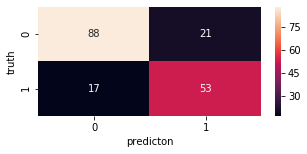

In [47]:
plt.figure(figsize=(5,2))
sb.heatmap(cm, annot=True)
plt.xlabel('predicton')
plt.ylabel('truth')